In [26]:
import pandas as pd
import requests  # Importa la librería requests para realizar solicitudes HTTP
import io  # Importa la librería io para manejar flujos de entrada/salida


url = "https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.FIFA.limpios.csv";

# Este código realiza una solicitud HTTP a la URL proporcionada y obtiene el texto de la respuesta.
s = requests.get(url).text  

datos = pd.read_csv(io.StringIO(s))


In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17955 entries, 0 to 17954
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17955 non-null  int64  
 1   Name                      17955 non-null  object 
 2   Age                       17955 non-null  int64  
 3   Nationality               17955 non-null  object 
 4   Overall                   17955 non-null  int64  
 5   Potential                 17955 non-null  int64  
 6   Club                      17955 non-null  object 
 7   Preferred.Foot            17907 non-null  object 
 8   International.Reputation  17907 non-null  float64
 9   Weak.Foot                 17907 non-null  float64
 10  Skill.Moves               17907 non-null  float64
 11  Height                    17907 non-null  object 
 12  Weight                    17907 non-null  object 
 13  Crossing                  17907 non-null  float64
 14  Finish

In [28]:
datos.head(10)

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Preferred.Foot,International.Reputation,Weak.Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Valor,Estatura,PesoKgs
0,1,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5.0,4.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000,1.70,72.12
1,2,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5.0,4.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000,1.88,83.01
2,3,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5.0,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000,1.75,68.04
3,4,De Gea,27,Spain,91,93,Manchester United,Right,4.0,3.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000,1.93,76.20
4,5,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4.0,5.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000,1.80,69.85
5,6,E. Hazard,27,Belgium,91,91,Chelsea,Right,4.0,4.0,...,27.0,22.0,11.0,12.0,6.0,8.0,8.0,93000000,1.73,73.94
6,7,L. Modric,32,Croatia,91,91,Real Madrid,Right,4.0,4.0,...,76.0,73.0,13.0,9.0,7.0,14.0,9.0,67000000,1.73,66.22
7,8,L. Su�rez,31,Uruguay,91,91,FC Barcelona,Right,5.0,4.0,...,45.0,38.0,27.0,25.0,31.0,33.0,37.0,80000000,1.83,86.18
8,9,Sergio Ramos,32,Spain,91,91,Real Madrid,Right,4.0,3.0,...,92.0,91.0,11.0,8.0,9.0,7.0,11.0,51000000,1.83,82.10
9,10,J. Oblak,25,Slovenia,90,93,Atl�tico Madrid,Right,3.0,3.0,...,12.0,18.0,86.0,92.0,78.0,88.0,89.0,68000000,1.88,87.09


In [31]:
newDatos = datos[['Estatura','PesoKgs']]
x_notnull = datos['Estatura'].notna()
y_notnmul = datos['PesoKgs'].notna()
datos_limpios = newDatos[x_notnull & y_notnmul]
datos_limpios.head(10)

,Estatura,PesoKgs
0,1.70,72.12
1,1.88,83.01
2,1.75,68.04
3,1.93,76.20
4,1.80,69.85
5,1.73,73.94
6,1.73,66.22
7,1.83,86.18
8,1.83,82.10
9,1.88,87.09


<Axes: xlabel='Estatura', ylabel='PesoKgs'>

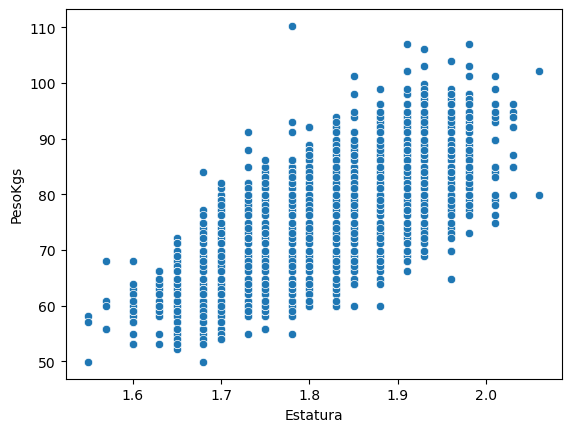

In [34]:
import seaborn as sb
sb.scatterplot(x='Estatura', y='PesoKgs', data=datos_limpios)

In [35]:
x = datos_limpios['Estatura']
y = datos_limpios['PesoKgs']

In [36]:
x, y

(0        1.70
 1        1.88
 2        1.75
 3        1.93
 4        1.80
          ... 
 17950    1.75
 17951    1.91
 17952    1.73
 17953    1.78
 17954    1.78
 Name: Estatura, Length: 17907, dtype: float64,
 0        72.12
 1        83.01
 2        68.04
 3        76.20
 4        69.85
          ...  
 17950    60.78
 17951    77.11
 17952    67.13
 17953    69.85
 17954    79.83
 Name: PesoKgs, Length: 17907, dtype: float64)

In [37]:

"""
El método .reshape() en numpy se utiliza para cambiar la forma de un array sin cambiar sus datos. 
El parámetro -1 en el método .reshape() se utiliza para inferir automáticamente la dimensión desconocida 
basándose en la longitud del array y las otras dimensiones especificadas.
"""


x_procesada = x.values.reshape(-1,1)
y_procesada = y.values.reshape(-1,1)

In [38]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

In [39]:
"""
! Entrenamos al modelo con los datos procesados
"""
modelo.fit(x_procesada, y_procesada)

LinearRegression()

In [40]:
estatura = 1.66
prediccion = modelo.predict([[estatura]])
print(f"Una altura de {estatura} m corresponde a un peso de {prediccion[0][0]} kg")

Una altura de 1.66 m corresponde a un peso de 63.26460334098023 kg


### Mejoramos el modelo

In [42]:
x_unicos = []
y_unicos = []

for i in range(len(x_procesada)):
    if x_procesada[i] not in x_unicos:
        x_unicos.append(x_procesada[i,0])
        y_unicos.append(y_procesada[i,0])

unicos = {'Estatura': x_unicos, 'PesoKgs': y_unicos}

In [43]:
datos_unicos = pd.DataFrame(unicos)
datos_unicos

,Estatura,PesoKgs
0,1.70,72.12
1,1.88,83.01
2,1.75,68.04
3,1.93,76.20
4,1.80,69.85
5,1.73,73.94
6,1.83,86.18
7,1.68,72.12
8,1.78,74.84
9,1.98,96.16


<Axes: xlabel='Estatura', ylabel='PesoKgs'>

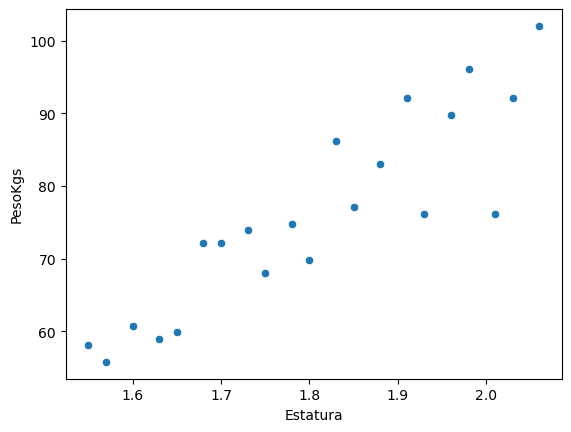

In [45]:
sb.scatterplot(x='Estatura', y='PesoKgs', data=datos_unicos)

In [46]:
x_unicos = datos_unicos['Estatura']
x_unicos_procesada = x_unicos.values.reshape(-1,1)
y_unicos = datos_unicos['PesoKgs']
y_unicos_procesada = y_unicos.values.reshape(-1,1)

In [49]:
modelo = LinearRegression()
modelo.fit(x_unicos_procesada, y_unicos_procesada)
modelo.score(x_unicos_procesada, y_unicos_procesada)

0.8022045421331013

In [50]:
estatura = 1.93
prediccion = modelo.predict([[estatura]])
print(f"Una altura de {estatura} m corresponde a un peso de {prediccion[0][0]} kg")

Una altura de 1.93 m corresponde a un peso de 85.54999714340121 kg
